# Introduction to GWpy
Welcome to the quickstart tutorial on GWpy, written for the LIGO Open Data Workshop, 2018

This tutorial will briefly describe GWpy, a python package for gravitational astrophysics, and walk-through how you can use this to speed up access to, and processing of, LOSC data.

Notes:

- this notebook, and others in this series, were generated using python 3.5, but should work on python 2.7, 3.4, 3.5, and 3.6
- GWpy is currently not available on Windows, sorry

## Installing GWpy
First, we need to install GWpy, to do that we use [`pip`](https://docs.python.org/3.6/installing/).
This usage might look a little different than normal, simply because we want to do this directly from the notebook.

Note that we explicit include the `[hdf5]` _extra_ to make sure that [`h5py`](http://www.h5py.org/) gets installed as well., since we need that to read the data files hosted by LOSC:

In [1]:
import sys
!{sys.executable} -m pip install "gwpy>=0.8.0[hdf5]"

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pip/pep425tags.py:260: PendingDeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
  Could not find a version that satisfies the requirement gwpy>=0.8.0[hdf5] (from versions: 0.1a1, 0.1a2, 0.1a3, 0.1a4, 0.1a5, 0.1a7, 0.1a8, 0.1a9, 0.1a10, 0.1b1, 0.1b2, 0.1b3, 0.1b4, 0.1, 0.2, 0.3, 0.4, 0.5, 0.5.1, 0.5.2, 0.6, 0.6.1, 0.6.2, 0.7.0, 0.7.1, 0.7.3, 0.7.4, 0.7.5)
No matching distribution found for gwpy>=0.8.0[hdf5]


To verify that this worked, we can try to `import gwpy` and inspect the path and version number:

In [2]:
import gwpy
print(gwpy.__path__)
print(gwpy.__version__)

['/Users/duncan/Library/Python/3.5/lib/python/site-packages/gwpy']
0.6.2+721.g3d19d6ec.dirty


## Finding open data

### Events in [O1](https://losc.ligo.org/O1/)
The next thing to do is to find some open data. Let's try to get some for GW150914, the first direct detection of an astrophysical gravitational-wave signal.

We can use the TimeSeries.fetch_open_data method to download data directly from https://losc.ligo.org, but wee need to know the GPS times. We can query for the GPS time of an event as follows:

In [3]:
from gwpy.io.losc import event_gps
gps = event_gps('GW150914')
print(gps)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/bleach/__init__.py:32: DeprecationWarning: Support for html5lib-python < 1.0.0 is deprecated.
  warnings.warn('Support for html5lib-python < 1.0.0 is deprecated.', DeprecationWarning)


1126259462.0


Now we can build a `[start, end)` GPS segment to 10 seconds around this time, using integers for convenience:

In [4]:
segment = (int(gps)-5, int(gps)+5)

and can now query for the full data.
For this example we choose to retrieve data for the LIGO-Hanford interferometer, using the identifier `'H1'`.
We could have chosen either of

- `'H1'` - LIGO-Hanford
- `'L1'` - LIGO-Livingston

Depending on the detector network for a given event, we could choose one of:

- `'G1`' - GEO600
- `'K1'` - KAGRA
- `'V1'` - (Advanced) Virgo

In [5]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
print(data)

Fetched 1 URLs from https://losc.ligo.org for [1126259457 .. 1126259467)
Reading data... [Done]
TimeSeries([ -3.37408113e-19, -3.60538427e-19, -3.22327735e-19,
            ...,   1.52206625e-19,  1.58897479e-19,
              1.71197631e-19]
           unit: Unit(dimensionless),
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


The `verbose=True` flag lets us see that GWpy has discovered one file that provides the data for the given interval, has downloaded it, and loaded the data.
The file is not stored permanently, so next time you do the same call, it will be downloaded again, however, if you know you might repeat the same call many times, you can use `cache=True` to store the file on your computer.

We have now downloaded real LIGO data for GW150914! These are the actual data used in the analysis that discovered the first gravitational-wave signal.

### Events in O2 (and beyond)
Let's try the same procedure for an event in O2, say GW170817.

In [6]:
gps = event_gps('GW170817')
segment = (int(gps) - 5, int(gps) + 5)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True, cache=True)

ValueError: multiple LOSC URL tags discovered in dataset, please select one of: 'C00', 'CLN'

This error is actually useful, and tells us that LOSC is providing two different datasets for this event:

- `'C00'` - the calibrated output of the detector
- `'CLN'` - a cleaned version of `'C00'` with some known noises removed

We need to specify which one we want in order to download the data:

In [7]:
hdata = TimeSeries.fetch_open_data('H1', *segment, tag='CLN', verbose=True)
print(hdata)

Fetched 1 URLs from https://losc.ligo.org for [1187008877 .. 1187008887)
Reading data... [Done]
TimeSeries([ -2.07535931e-17, -2.07549921e-17, -2.07426622e-17,
            ...,  -2.30985486e-17, -2.31243374e-17,
             -2.31374493e-17]
           unit: Unit(dimensionless),
           t0: 1187008877.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


We have now downloaded real, cleaned LIGO data for GW170817!

To sanity check things, we can easily make a plot, using the [`plot()`](https://gwpy.github.io/docs/stable/timeseries/plot.html) method of the `hdata` `TimeSeries`.

<div class="alert alert-info">
Since this is the first time we are plotting something in this notebook, we need to make configure `matplotlib` (the plotting library) to work within the notebook properly:
</div>

In [8]:
%matplotlib inline

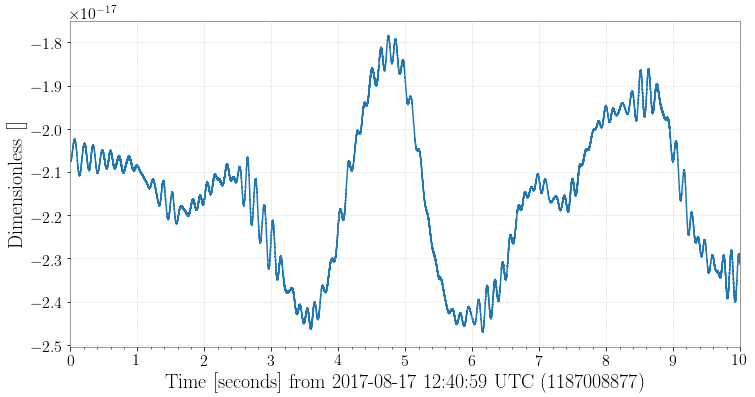

In [9]:
plot = hdata.plot()